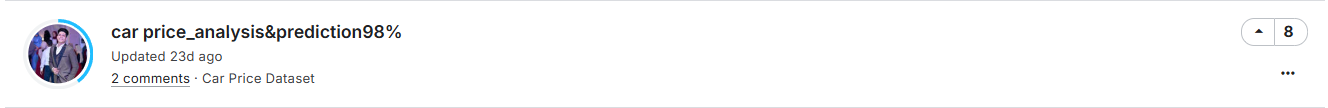

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from warnings import filterwarnings
# Ignore warnings
filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('../car_price_dataset.csv')

In [5]:
# Display the first few rows of the dataset
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [4]:
# Check for missing values
print(data.isnull().sum())

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


In [6]:
# Handle missing values (if necessary)
data.dropna(inplace=True)

In [7]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

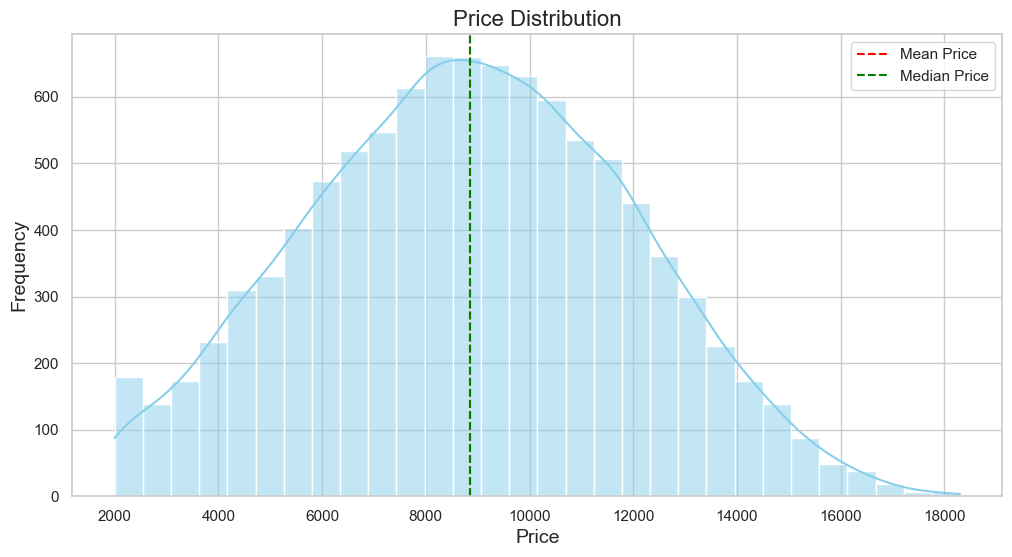

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(data['Price'].mean(), color='red', linestyle='--', label='Mean Price')
plt.axvline(data['Price'].median(), color='green', linestyle='--', label='Median Price')
plt.legend()
plt.show()

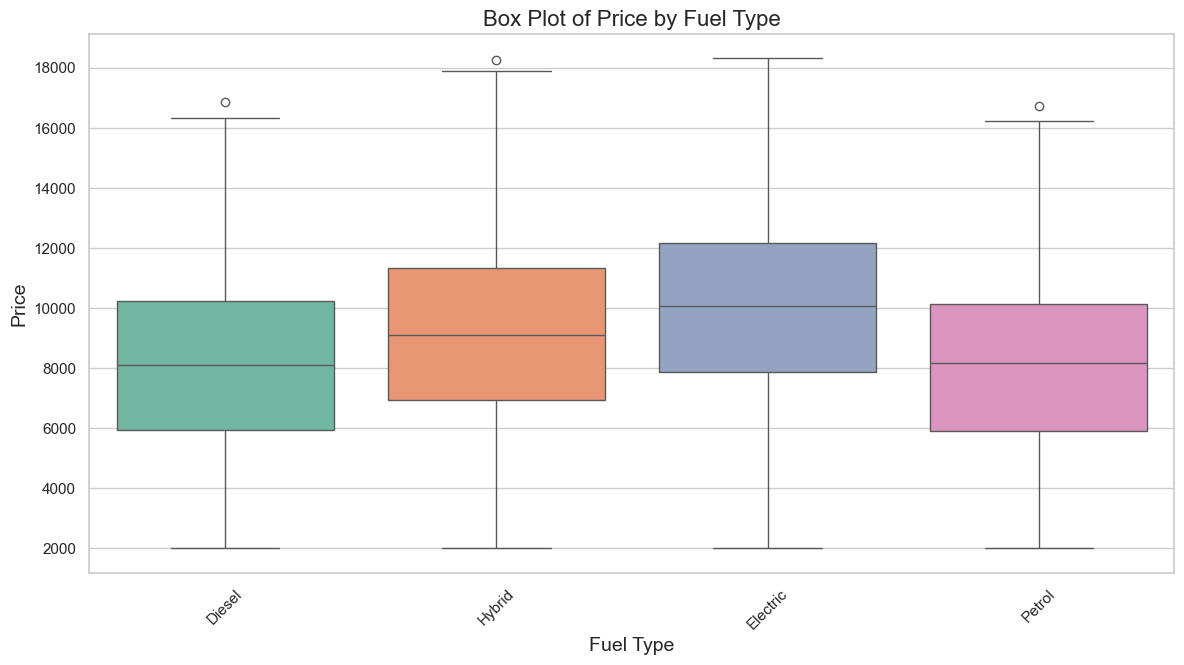

In [11]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Fuel_Type', y='Price', data=data, palette='Set2')
plt.title('Box Plot of Price by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.show()

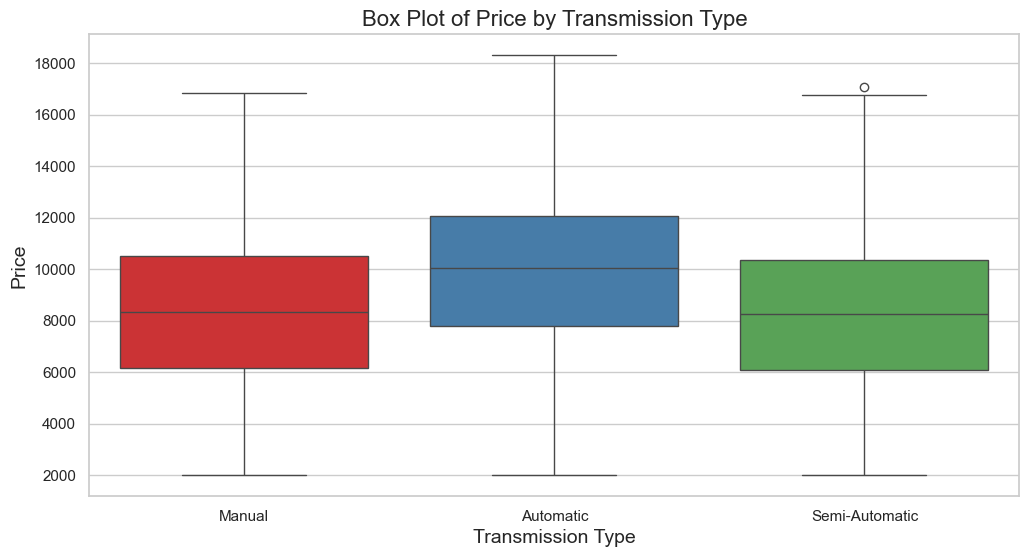

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transmission', y='Price', data=data, palette='Set1')
plt.title('Box Plot of Price by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

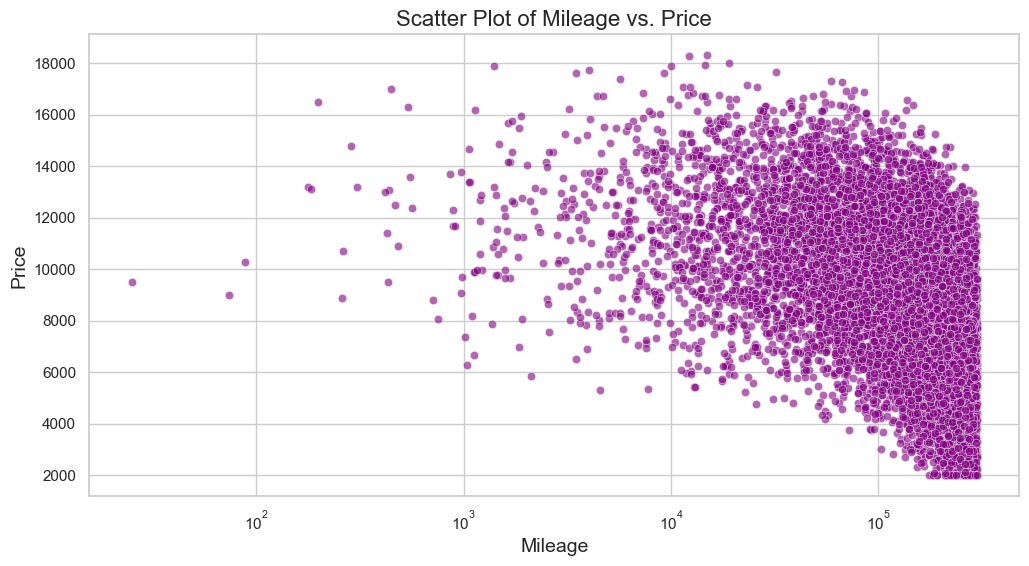

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Mileage', y='Price', data=data, color='purple', alpha=0.6)
plt.title('Scatter Plot of Mileage vs. Price', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xscale('log')  # Log scale for better visibility
plt.show()

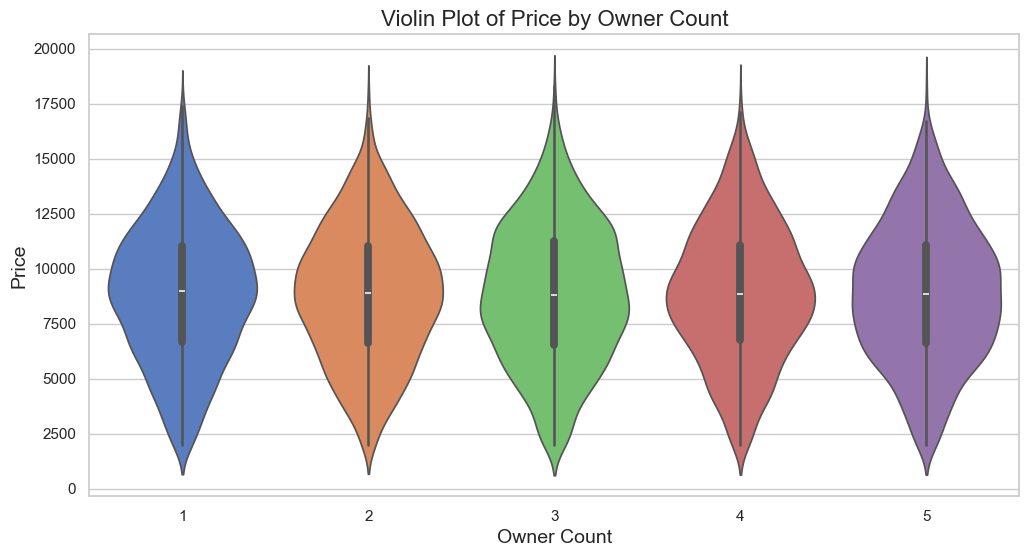

In [16]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Owner_Count', y='Price', data=data, palette='muted')
plt.title('Violin Plot of Price by Owner Count', fontsize=16)
plt.xlabel('Owner Count', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

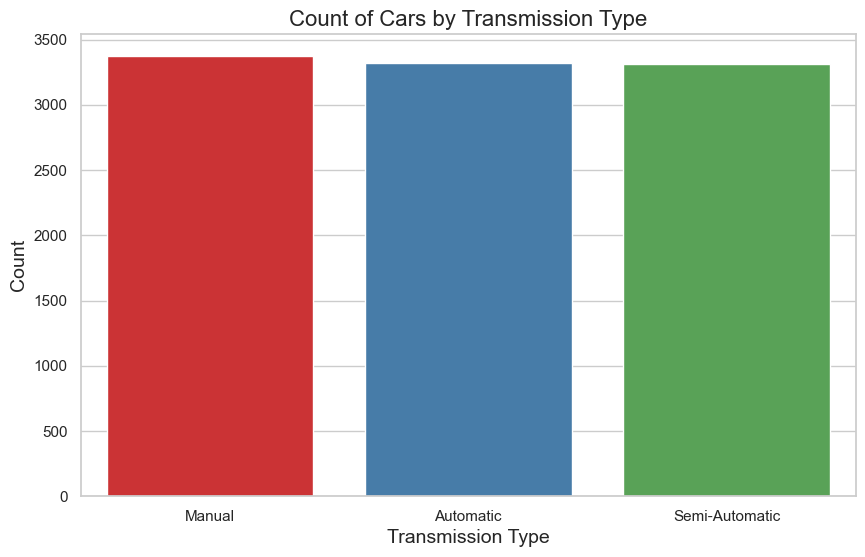

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Transmission', data=data, palette='Set1')
plt.title('Count of Cars by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

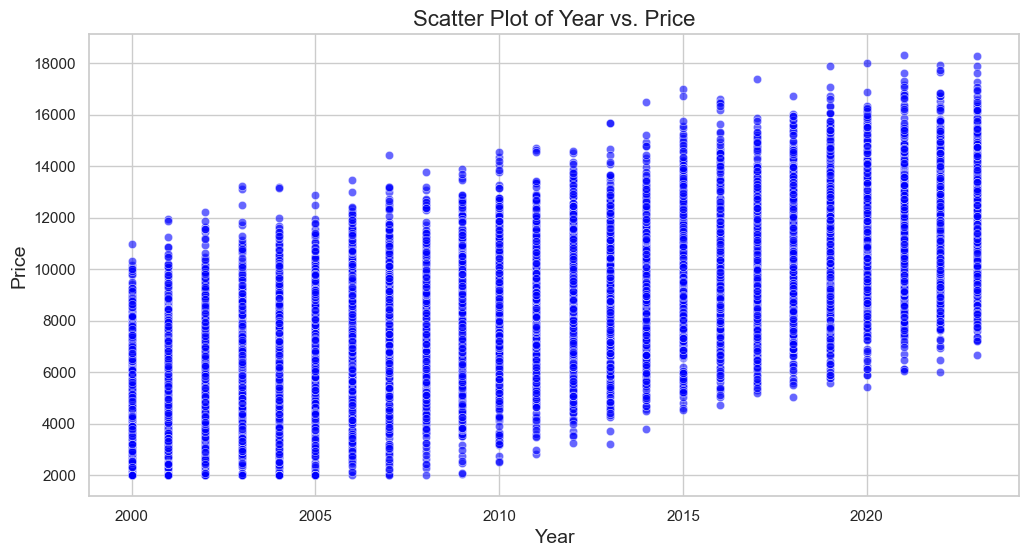

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Price', data=data, color='blue', alpha=0.6)
plt.title('Scatter Plot of Year vs. Price', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

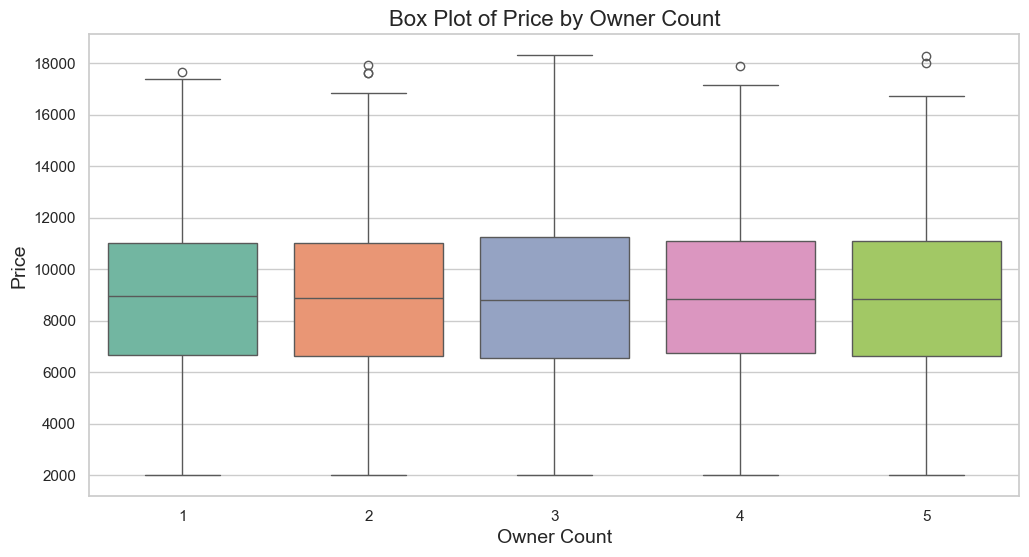

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Owner_Count', y='Price', data=data, palette='Set2')
plt.title('Box Plot of Price by Owner Count', fontsize=16)
plt.xlabel('Owner Count', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

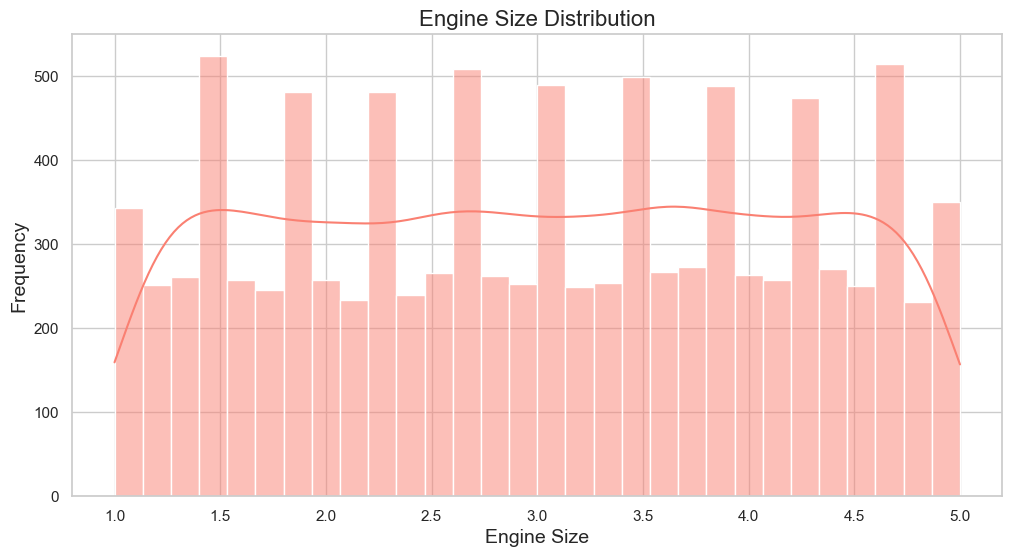

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Engine_Size'], bins=30, kde=True, color='salmon')
plt.title('Engine Size Distribution', fontsize=16)
plt.xlabel('Engine Size', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

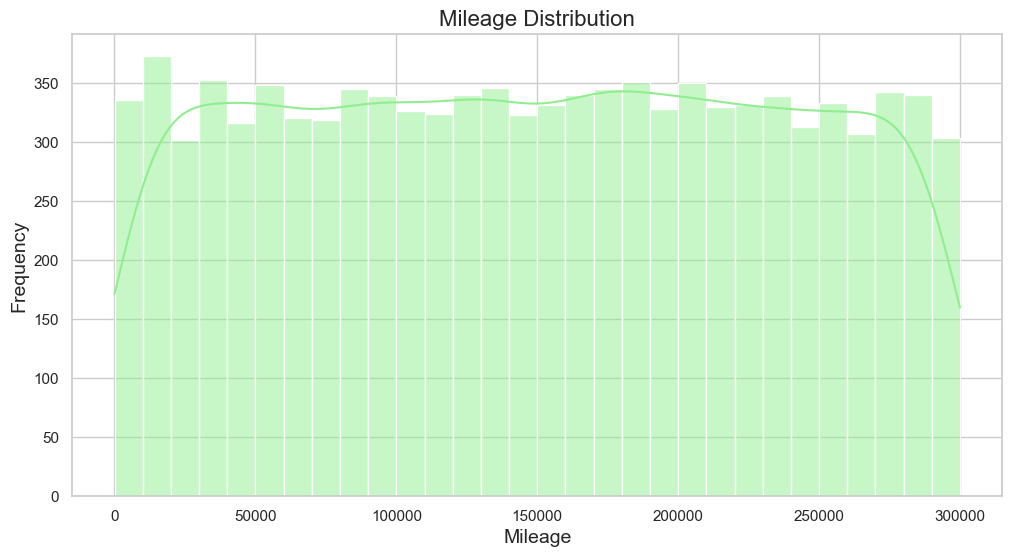

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Mileage'], bins=30, kde=True, color='lightgreen')
plt.title('Mileage Distribution', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

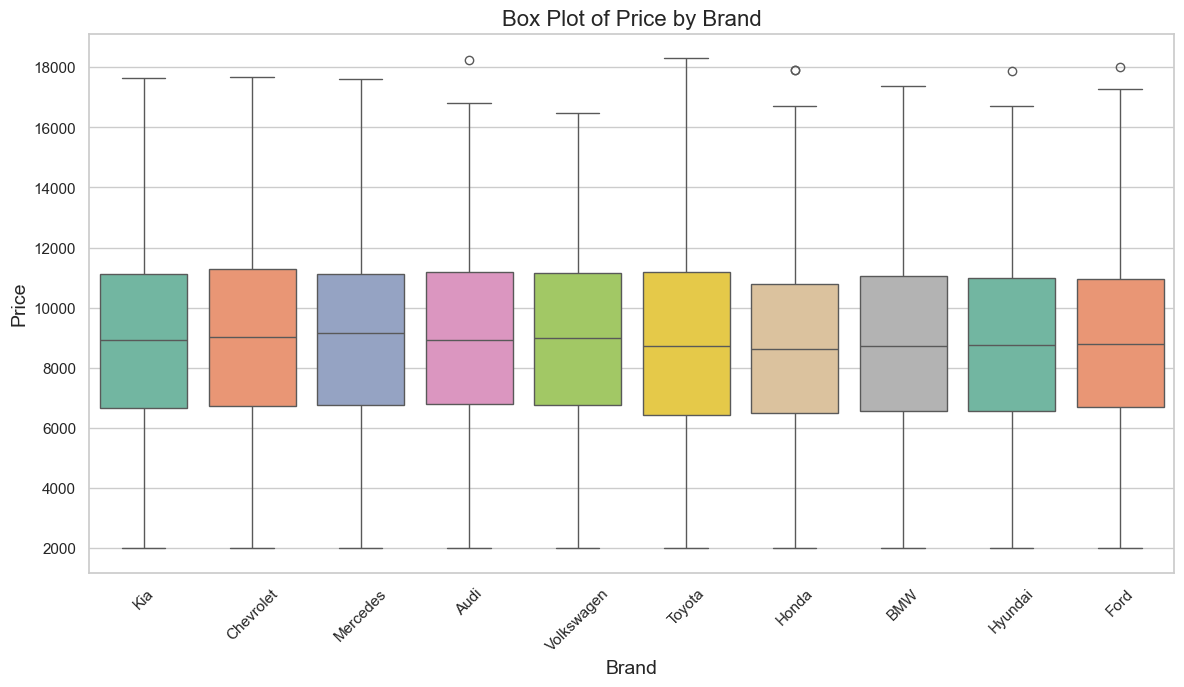

In [22]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Brand', y='Price', data=data, palette='Set2')
plt.title('Box Plot of Price by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.show()

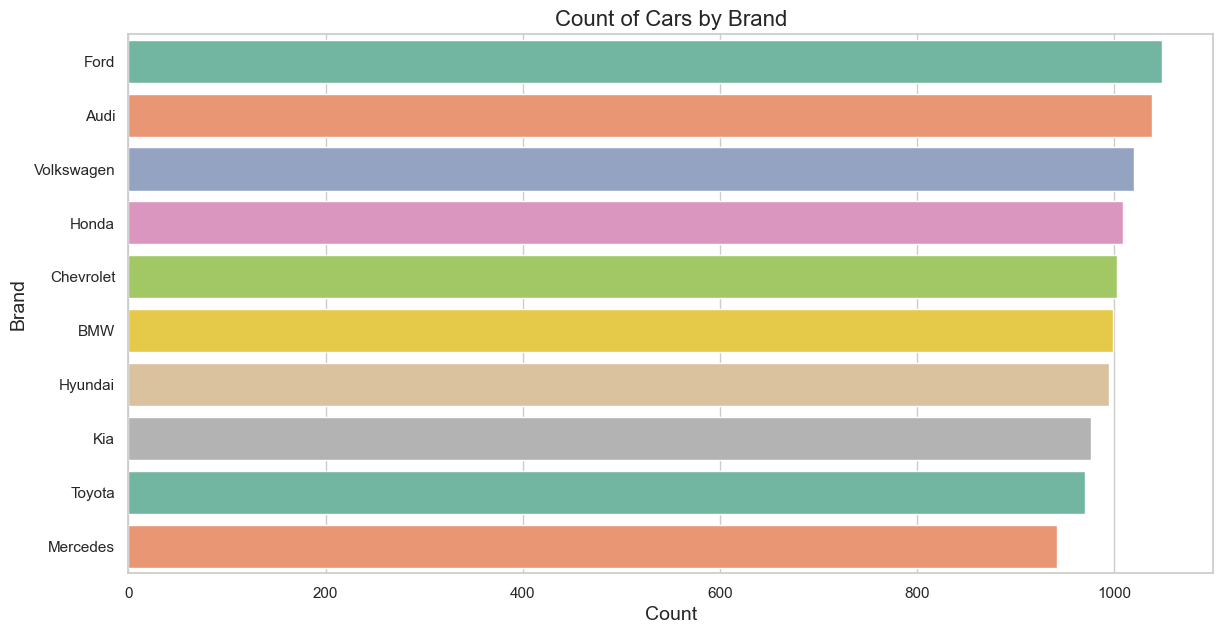

In [23]:
plt.figure(figsize=(14, 7))
sns.countplot(y='Brand', data=data, palette='Set2', order=data['Brand'].value_counts().index)
plt.title('Count of Cars by Brand', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.show()

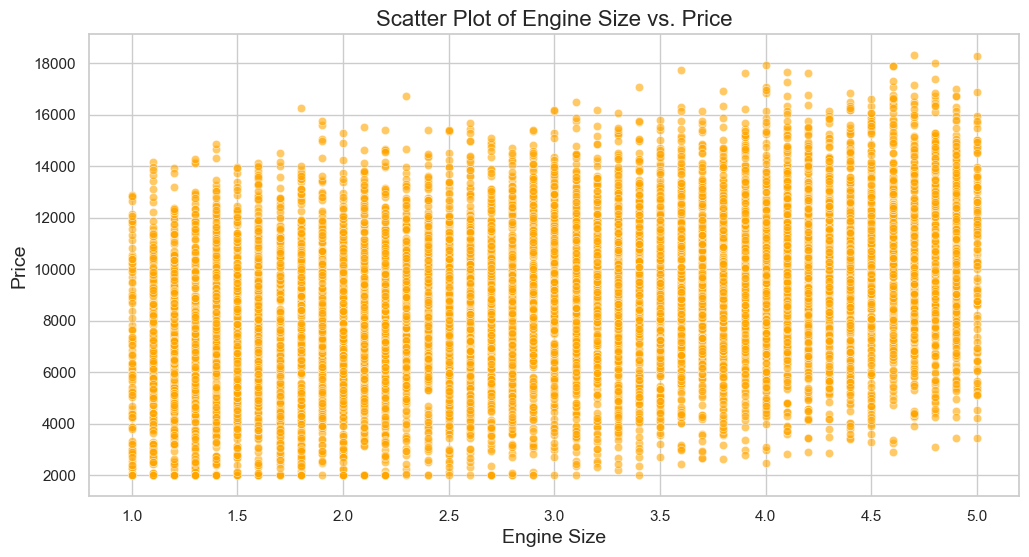

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Engine_Size', y='Price', data=data, color='orange', alpha=0.6)
plt.title('Scatter Plot of Engine Size vs. Price', fontsize=16)
plt.xlabel('Engine Size', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

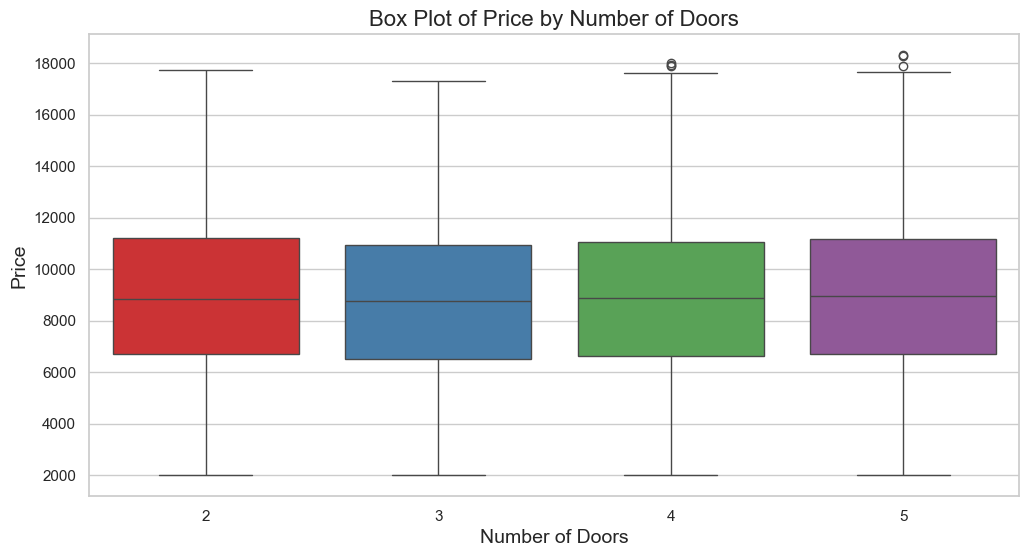

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Doors', y='Price', data=data, palette='Set1')
plt.title('Box Plot of Price by Number of Doors', fontsize=16)
plt.xlabel('Number of Doors', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

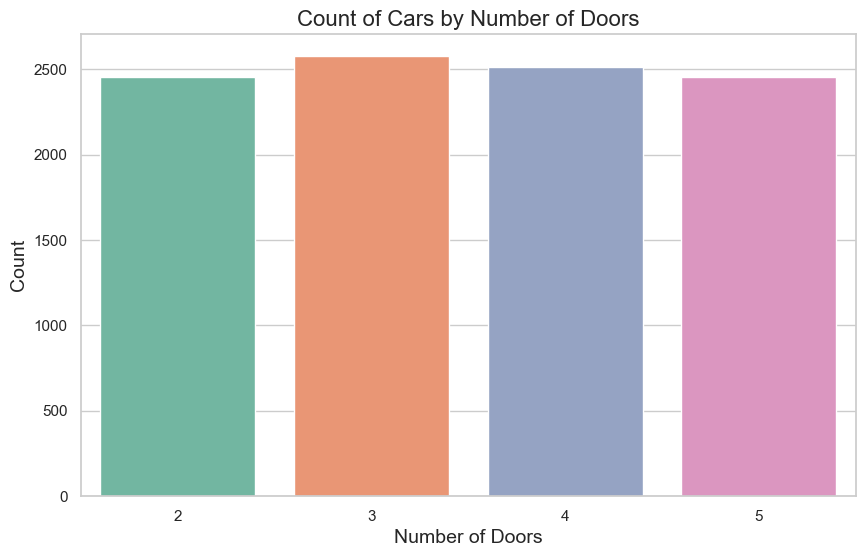

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Doors', data=data, palette='Set2')
plt.title('Count of Cars by Number of Doors', fontsize=16)
plt.xlabel('Number of Doors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

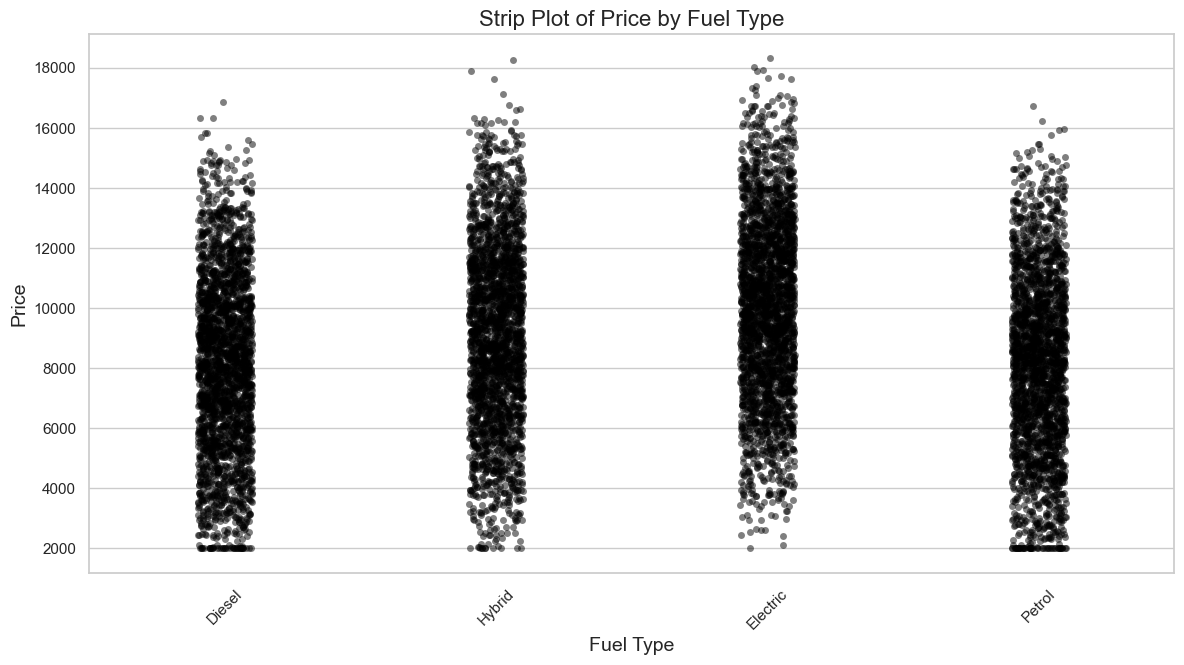

In [27]:
plt.figure(figsize=(14, 7))
sns.stripplot(x='Fuel_Type', y='Price', data=data, color='black', alpha=0.5)
plt.title('Strip Plot of Price by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [33]:
# Create the age of the car
data['Age'] = 2023 - data['Year']

# Select features and target variable
features = ['Brand', 'Model', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage', 'Doors', 'Owner_Count', 'Age']
target = 'Price'
X = data[features]
y = data[target]
data

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Age
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,3
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,11
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,3
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,0
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,20
...,...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884,19
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240,21
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866,13
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084,21


In [34]:
# One-hot encoding for categorical variables
categorical_features = ['Brand', 'Model', 'Fuel_Type', 'Transmission']
numeric_features = ['Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Age']

In [35]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

In [36]:
# Model pipeline with Random Forest Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

In [37]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
}

In [39]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['Engine_Size',
                                                                          'Mileage',
                                                                          'Doors',
                                                                          'Owner_Count',
                                                                          'Age']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Brand',
                                                                          'Model',
                                                                          'Fuel_Type',
                                                                          'Transmission'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [40]:
# Best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'model__max_depth': None, 'model__n_estimators': 200}


In [41]:
# Predictions
y_pred = best_model.predict(X_test)

In [42]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R^2: {r2:.2f}')

RMSE: 538.90
MAE: 435.76
R^2: 0.97


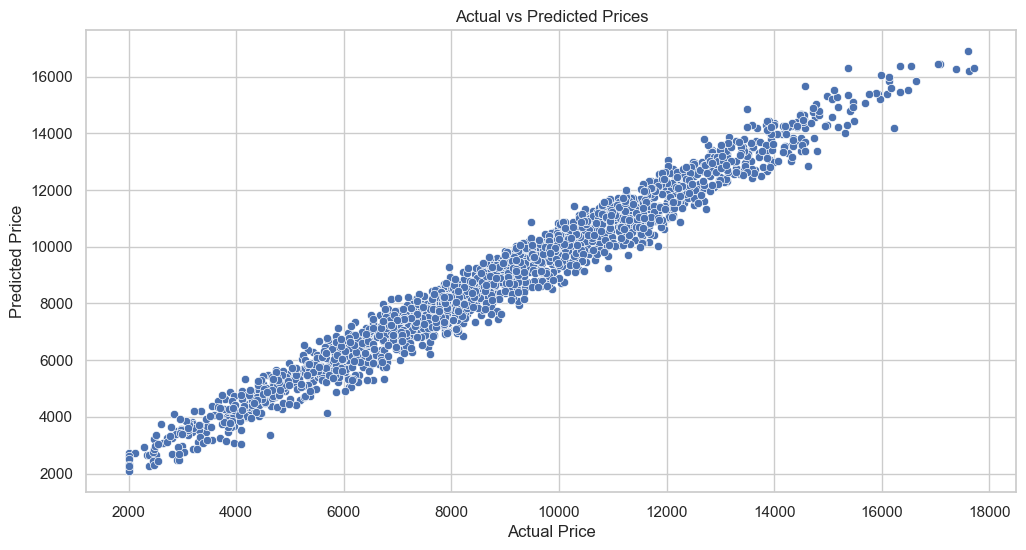

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()